In [6]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd

In [7]:
#from dask.distributed import Client
#client = Client()

In [8]:
out_dir = "../results"

In [9]:
path_f = f"{out_dir}/full_run_firm.csv"

In [11]:
firm_dk = dd.read_csv(path_f, blocksize=1000000 , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [15]:
firm_dk

,t,id,age,number_employees,total_effort,output,average_pref
npartitions=1,,,,,,,
,int16,int32,int16,int32,float64,float64,float64
,...,...,...,...,...,...,...


In [12]:
firm_dk.memory_usage(deep=True).compute()

Index                  3254016
age                  671939878
average_pref        2687759512
id                  1343879756
number_employees    1343879756
output              2687759512
t                    671939878
total_effort        2687759512
dtype: int64

In [ ]:
chunk = pd.read_csv(path_f, chunksize=1000000)

In [29]:
#firm_dk.to_parquet(f"{out_dir}/firm_full.parquet", engine="pyarrow")

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting


KilledWorker: ("('to-parquet-3313dc6214517e20944f360e3c98dde7', 0)", <WorkerState 'tcp://127.0.0.1:56278', name: 3, status: closed, memory: 0, processing: 1>)

In [ ]:
type(firm_dk)

In [16]:
firm_number = firm_dk.groupby(firm_dk.t).t.size()

In [15]:
print(firm_dk)

Dask DataFrame Structure:
                   t     id    age number_employees total_effort   output average_pref
npartitions=1                                                                         
               int64  int64  int64            int64      float64  float64      float64
                 ...    ...    ...              ...          ...      ...          ...
Dask Name: read-csv, 1 tasks


In [17]:
firm_number_df = firm_number.compute()

In [19]:
firm_number_df

t
0      2198759
1      2120162
2      2047738
3      1980054
4      1916992
        ...   
995     302169
996     301704
997     302086
998     301875
999     301689
Name: t, Length: 1000, dtype: int64

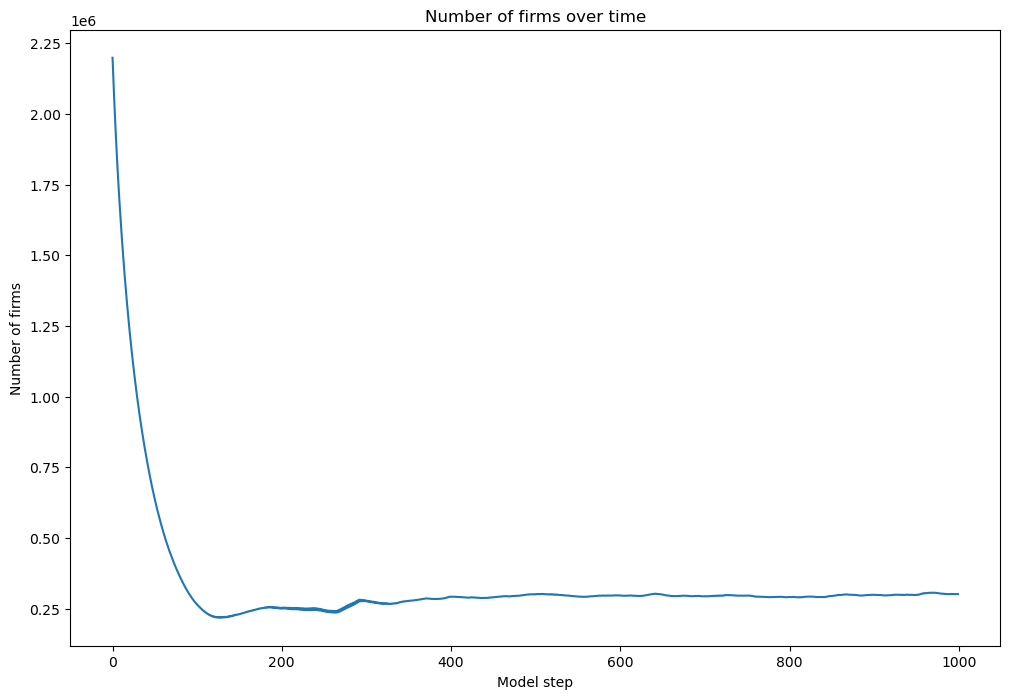

In [18]:
# firm_number_df = firm_number.compute()
plt.figure(figsize=(12, 8))
firm_number_df.plot()
plt.xlabel("Model step")
plt.ylabel("Number of firms")
plt.title("Number of firms over time")
plt.savefig(f"{out_dir}/fullrun_numbfirms.png")
plt.show()